# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("health.csv")
df.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


### Summary Of Dataset

In [3]:
# print summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
,479688.0,239844.500000,138474.142300,1.0,119922.75,239844.5,359766.25,479688.0
AGE,479688.0,44.912264,18.961084,0.0,34.00,47.0,59.00,107.0
PREAUTH_AMT,479688.0,30428.941698,27441.592281,5.0,12500.00,25000.0,35000.00,520000.0
CLAIM_AMOUNT,479688.0,27652.205861,25951.706037,2.0,12500.00,23200.0,30600.00,520000.0


We can see from the above summary matrix that the average age of a patience is **44** with the oldest being **107**.

We also notice that the minimum **pre-authorised amount** is around **5** and maximum is **520000** with and average of **31408**.

Also **claim amount** has an average of **28202**, minimum of **2** and maximum of **520000**.



### Distribution Of Gender

In [4]:
df['SEX'].value_counts()

Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: SEX, dtype: int64

As we can see there are duplicate values ​​in this column. Male and MALE are not two different sexes. We can substitute the column names to resolve this issue. I will also rename Male (Child) -> Boy and Female (Child) -> Girl for convenience.

In [5]:
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
df['SEX'] = df['SEX'].replace(mappings)
df['SEX'].value_counts()

Male      260727
Female    178968
Boy        25068
Girl       14925
Name: SEX, dtype: int64

<AxesSubplot:>

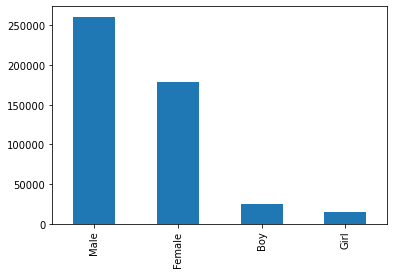

In [10]:
# plot the value counts of sex 
df['SEX'].value_counts().plot.bar()

We notice that there are more males patiences in our dataset.

### Age Range And Distribution

<AxesSubplot:>

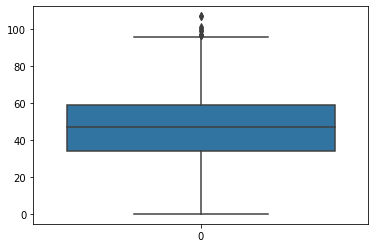

In [12]:
sns.boxplot(data=df['AGE'])

As we can see, the age ranges from **0** to **100** with some outliers going beyond 100.

### The Most Common Surgery in Each District

In [13]:
for i in df['DISTRICT_NAME'].unique():
    print("District: {}\n Disease and Count: {}\n '============'\n".format(i,
                                                                           df[df['DISTRICT_NAME']==i]
                                                                           ['SURGERY'].value_counts().head(1)))


District: Srikakulam
 Disease and Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
 '============'

District: Kurnool
 Disease and Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
 '============'

District: Vizianagaram
 Disease and Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
 '============'

District: Guntur
 Disease and Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
 '============'

District: Vishakhapatnam
 Disease and Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
 '============'

District: West Godavari
 Disease and Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
 '============'

District: Krishna
 Disease and Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
 '============'

District: East Godavari
 Disease and Count: Surgical Correction Of Longbone Fracture    

<br>

Our analysis shows that **Nellore** performs Maintenance Hemodialysis For Crf which has the highest surgery count.

We can also notice that there are two surgeries involved in all districts, e.i. **Hemodialysis** and **Longbone Fracture**.

### Average Claim Amount for Each District

In [14]:
for i in df['DISTRICT_NAME'].unique():
    print("District: {}\n Average Claim Amount: ₹{}\n '============'\n".format(i,df[df['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))



District: Srikakulam
 Average Claim Amount: ₹25593.712618634367
 '============'

District: Kurnool
 Average Claim Amount: ₹28598.91853309593
 '============'

District: Vizianagaram
 Average Claim Amount: ₹25097.78006899492
 '============'

District: Guntur
 Average Claim Amount: ₹31048.73950729927
 '============'

District: Vishakhapatnam
 Average Claim Amount: ₹25977.94638304871
 '============'

District: West Godavari
 Average Claim Amount: ₹27936.70608610806
 '============'

District: Krishna
 Average Claim Amount: ₹31015.383233247547
 '============'

District: East Godavari
 Average Claim Amount: ₹26166.136719737173
 '============'

District: Prakasam
 Average Claim Amount: ₹28655.81036215859
 '============'

District: Nellore
 Average Claim Amount: ₹26105.122376744654
 '============'

District: YSR Kadapa
 Average Claim Amount: ₹27945.216899192998
 '============'

District: Chittoor
 Average Claim Amount: ₹25708.102690948628
 '============'

District: Anantapur
 Average Claim Amou

### Group Summary Statistics

In [15]:
df.groupby('CATEGORY_NAME').mean().sort_values(by='PREAUTH_AMT', ascending=False)

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797
SURGICAL GASTRO ENTEROLOGY,217841.149146,44.645103,64127.925427,59249.639712
PLASTIC SURGERY,198123.497622,27.419738,61115.505351,37437.164090
NEUROSURGERY,238563.168178,43.187689,53718.705139,49993.359806
SURGICAL ONCOLOGY,255125.222719,50.940826,45243.913335,42502.467151
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922
PEDIATRIC SURGERIES,229981.847773,3.504840,34134.385044,32061.504598


Cochlear Implant Surgery seems to be the costliest surgery, costing ₹520000 on average. Prostheses costs ₹1200, the cheapest. The youngest age group also happens to be for Cochlear Implant Surgery: 1.58 years, while Neurology has an average patient age of ~56.

### Summary Statistics For Each Hospital

In [16]:
df.groupby('HOSP_NAME').mean().sort_values(by='PREAUTH_AMT', ascending=False)

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
HOSP_NAME,,,,
Maa Hospitals Pvt. Ltd. Unit Of Vasavi Ent Institute,21998.200000,0.900000,520000.000000,520000.000000
Ent Nursing Home,228199.718519,24.170370,180289.111111,179959.925926
Quality Care India Ltd Care Hospitals- Nampally,171128.609195,51.080460,111662.545977,104898.310345
Ravindranath Ge Medical Associates Pvt Ltd. Global Hospital Lakdikapool,176444.859527,52.484006,103003.863700,98339.399166
Unimed Healthcare Pvt- Ltd Star Hospitals,199749.979339,30.871901,97351.223140,93570.347107
...,...,...,...,...
VENNELA NETHRALAYAM,456519.250000,52.785714,11000.000000,9464.285714
VIJAYA HOSPITALS,373476.162162,45.810811,11000.000000,9483.783784
NOBLE MULTI SPECIALITY HOSPITAL,429420.800000,42.800000,10944.000000,10944.000000


<br>

**Maa Hospitals Pvt. Ltd.** cost the highest with 
**pre-Authorised amount** of **520000**.

### Most Common Surgery and Count per age Group

In [17]:
# Most common surgery and count per age group
for i in sorted(df['AGE'].unique()):
    print("Age Group: {}\nMost Common Surgery and Count: {}\n'============'\n".format(i,df[df['AGE']==i]['CATEGORY_NAME'].value_counts().head(1)))

Age Group: 0
Most Common Surgery and Count: PEDIATRICS    15096
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 1
Most Common Surgery and Count: PEDIATRICS    1707
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 2
Most Common Surgery and Count: PEDIATRICS    918
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 3
Most Common Surgery and Count: PEDIATRICS    670
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 4
Most Common Surgery and Count: PEDIATRICS    691
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 5
Most Common Surgery and Count: PEDIATRICS    313
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 6
Most Common Surgery and Count: PEDIATRICS    307
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 7
Most Common Surgery and Count: POLY TRAUMA    299
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 8
Most Common Surgery and Count: POLY TRAUMA    322
Name: CATEGORY_NAME, dtype: int64
'==

Age Group: 99
Most Common Surgery and Count: POLY TRAUMA    1
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 100
Most Common Surgery and Count: POLY TRAUMA    1
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 101
Most Common Surgery and Count: POLY TRAUMA    1
Name: CATEGORY_NAME, dtype: int64
'============'

Age Group: 107
Most Common Surgery and Count: POLY TRAUMA    1
Name: CATEGORY_NAME, dtype: int64
'============'



In [18]:
df['DISTRICT_NAME'].value_counts()

East Godavari     55398
Guntur            50416
Krishna           41964
West Godavari     40995
Nellore           39836
Chittoor          36790
Vishakhapatnam    36481
Prakasam          34819
Kurnool           32013
YSR Kadapa        29244
Anantapur         28854
Srikakulam        27079
Vizianagaram      25799
Name: DISTRICT_NAME, dtype: int64

### Time Series Analysis

In [19]:
from datetime import datetime

df['SURGERY_DATE']=pd.to_datetime(df['SURGERY_DATE'])

In [20]:
df.set_index('SURGERY_DATE', inplace=True)

In [21]:
df.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
SURGERY_DATE,,,,,,,,,,,,,,,,,,,,,
2013-06-08,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,07/09/2013 00:00:00,NO,NaN,D
2013-08-08,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,09/09/2013 00:00:00,NO,NaN,D
2013-08-15,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,18/10/2013 00:00:00,NO,NaN,D
2013-08-24,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,27/09/2013 00:00:00,NO,NaN,D
2013-08-31,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,02/10/2013 00:00:00,NO,NaN,D


### Pre-Authorised Amount Over-time

We will use the average of the last 12 data points to check the trend. We will use a technique called *rolling average*.

A simple [***rolling average***](https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm) (also called a moving average) is the unweighted mean of the last n values.

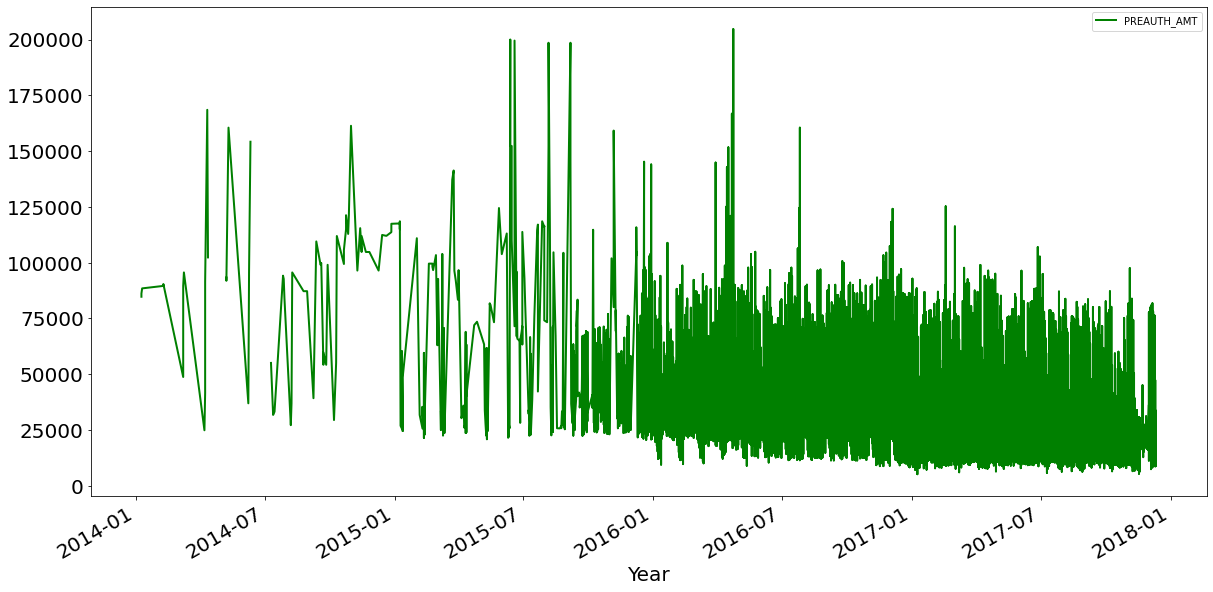

In [23]:
preauthorised = df[['PREAUTH_AMT']]
preauthorised.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20, color='green')
plt.xlabel('Year', fontsize=20);

The highest pre-authorised amounts are seen in the month of **July 2015** and early **2016**. 

We can also notice that there has been a lot of clustered pre-authorised amounts between **25000** and **100000** in **January 2016** and **July 2017**.

### Claim Amount Over-time

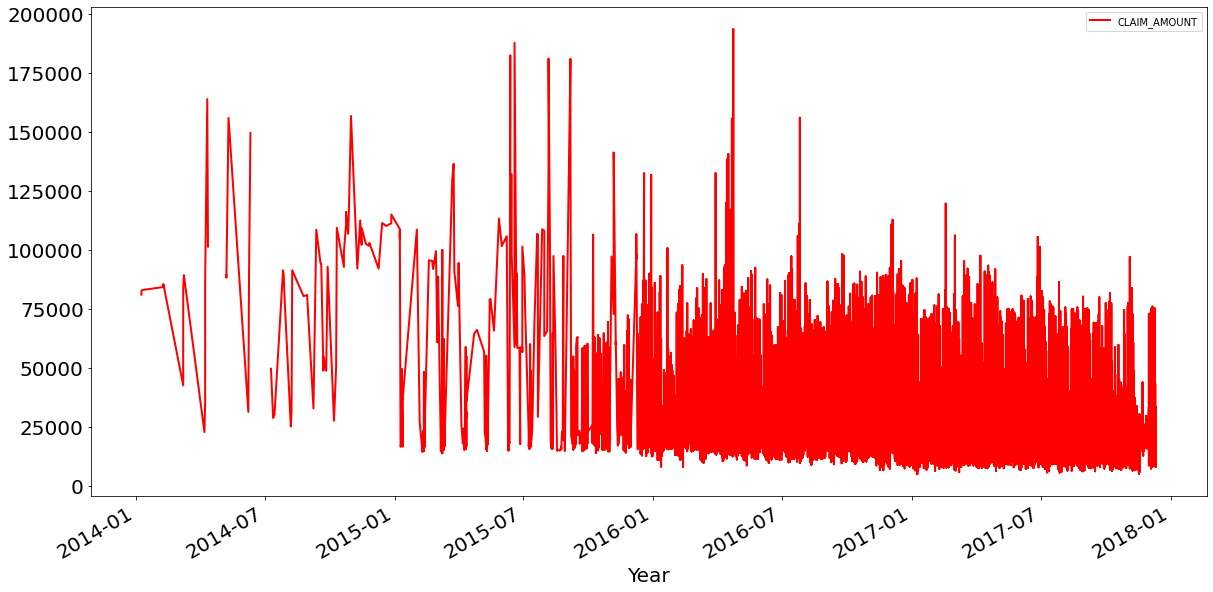

In [24]:
claim = df[['CLAIM_AMOUNT']]
claim.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20, color='red')
plt.xlabel('Year', fontsize=20);

We have a similar account as the *Pre-Authorised Amount Over-time*

### Patiences' Age Overtime

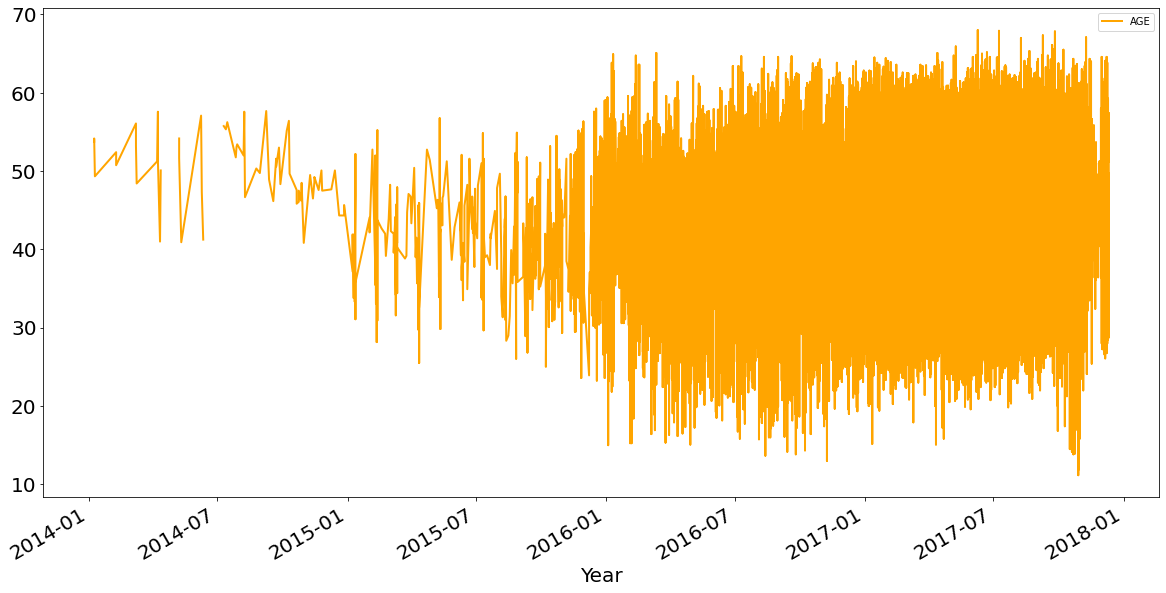

In [25]:
age = df[['AGE']]
age.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20,color='orange')
plt.xlabel('Year', fontsize=20);

Around **2014**, there were few old age patiences as compare to between **January, 2016** and **July 2017** where number of both young and old patiences increased significantly.